***Problem statement 1 : How do annual members and casual riders use Cyclistic bikes differently?***



----


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
year_22 = pd.read_csv('year_22.csv')

## 1. Time-bound analysis 

In [3]:
year_22['started_at'] = pd.to_datetime(year_22['started_at'])
year_22['ended_at'] = pd.to_datetime(year_22['ended_at'])

# Adding new column name ride duration in hour and in minute 
year_22['ride_duration_min'] = (year_22['ended_at']-year_22['started_at']).dt.total_seconds()/60
year_22['ride_duration_hr'] = (year_22['ended_at']-year_22['started_at']).dt.total_seconds()/3600

# Adding new column for the day of the week 
year_22['start_date'] = year_22['started_at'].dt.date
year_22['start_date'] = pd.to_datetime(year_22['start_date'])
year_22['day'] = year_22['start_date'].dt.strftime('%A')

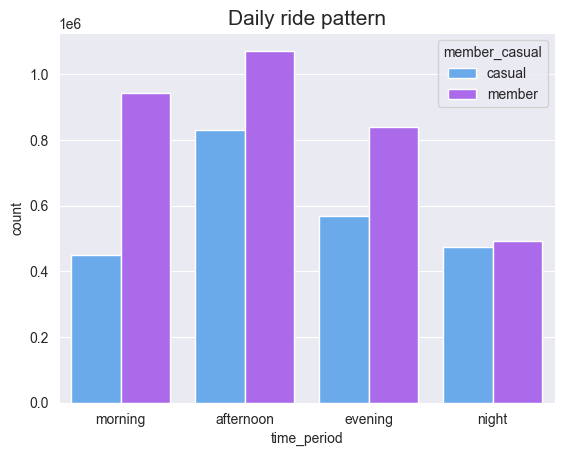

In [4]:
# Adding column for the time of the day 
year_22['hour'] = year_22['started_at'].dt.hour
def get_time_period(hour):
    if 5<= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 20:
        return 'evening'
    else:
        return 'night'
year_22['time_period'] = year_22['hour'].apply(get_time_period)

# visualization
sns.set_style('darkgrid')
sns.countplot(x='time_period',data = year_22,hue='member_casual',palette='cool',order=['morning','afternoon','evening','night'])

plt.title('Daily ride pattern',fontsize=15)
plt.show()

*In the morning ride booked by members are way more then the casual riders*

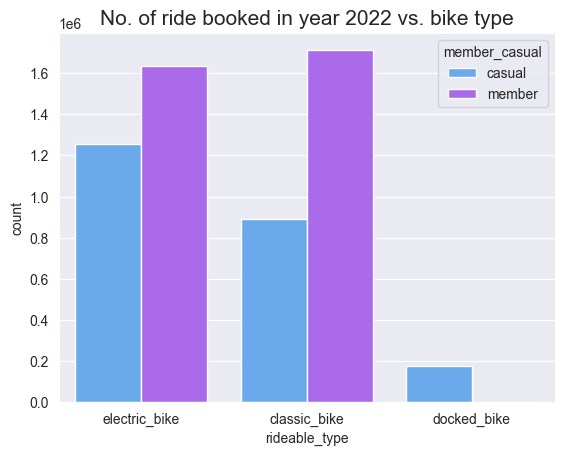

In [5]:
# visualization 

sns.set_style('darkgrid')
sns.countplot(x='rideable_type',data = year_22,hue='member_casual',palette='cool')

plt.title('No. of ride booked in year 2022 vs. bike type',fontsize=15)
plt.show()

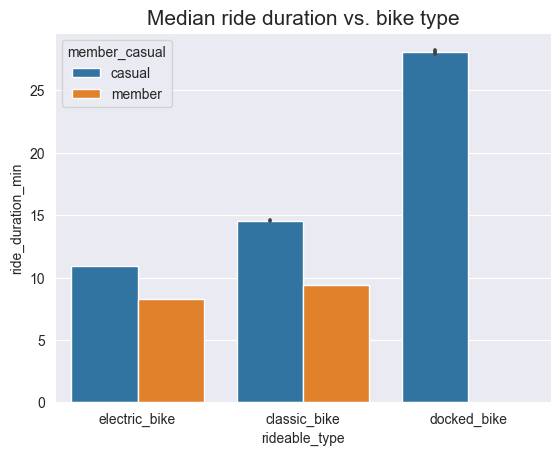

In [6]:
def custom_estimator(z):
    return np.median(z)
sns.barplot(x='rideable_type',y='ride_duration_min',data=year_22,hue='member_casual',estimator=custom_estimator)
plt.title('Median ride duration vs. bike type', fontsize = 15)
plt.show()

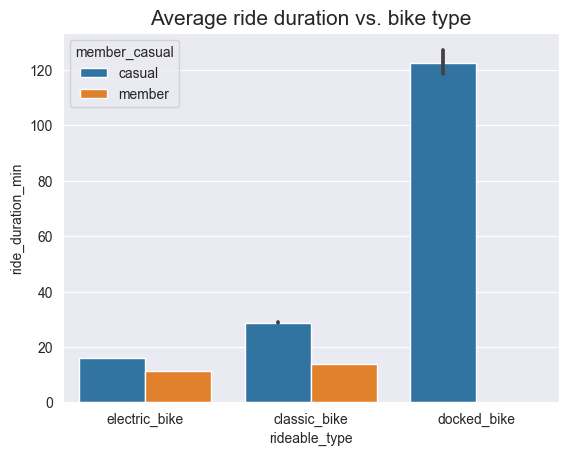

In [7]:
def custom_estimator(z):
    return np.mean(z)
sns.barplot(x='rideable_type',y='ride_duration_min',data=year_22,hue='member_casual',estimator=custom_estimator)
plt.title('Average ride duration vs. bike type', fontsize = 15)
plt.show()

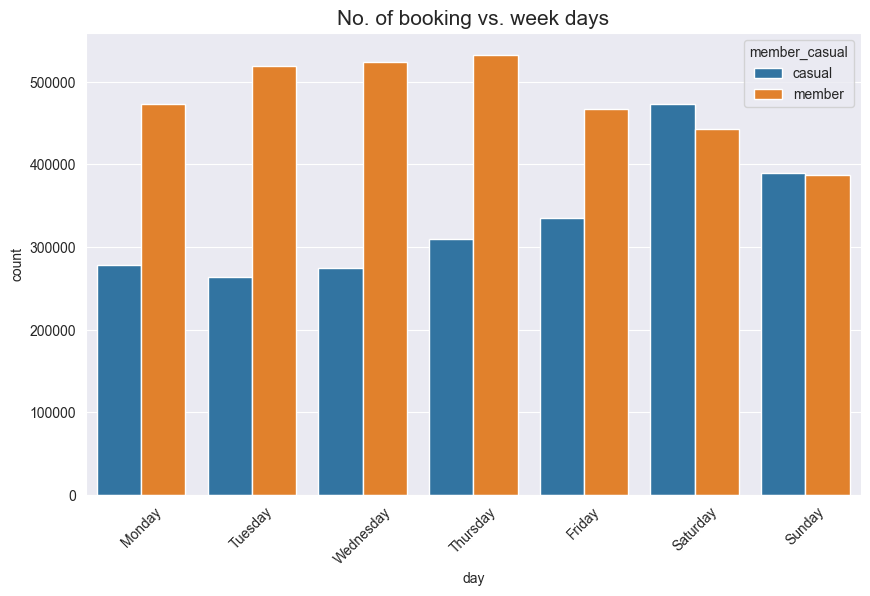

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(x='day',data=year_22,hue='member_casual',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('No. of booking vs. week days',fontsize=15)
plt.xticks(rotation=45)
plt.show()

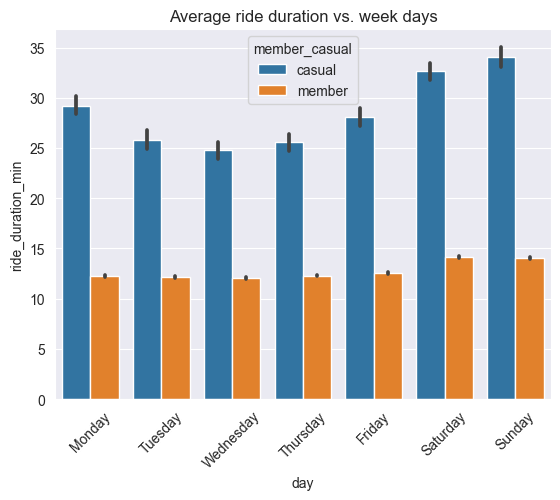

In [9]:
def custom_estimator(z):
    return np.mean(z)
#plt.figure(figsize=(10,8))
#sns.set_style('darkgrid')
sns.barplot(x='day',y='ride_duration_min',data=year_22,hue='member_casual',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Average ride duration vs. week days')
plt.xticks(rotation=45)
plt.show()

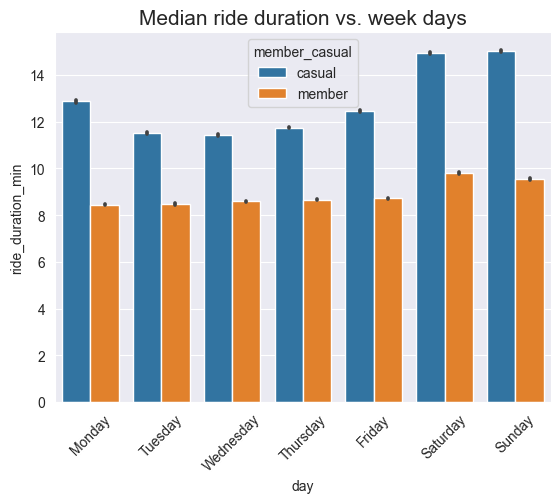

In [10]:
def custom_estimator(z):
    return np.median(z)
sns.barplot(x='day',y='ride_duration_min',data=year_22,hue='member_casual',estimator=custom_estimator,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Median ride duration vs. week days', fontsize = 15)
plt.xticks(rotation=45)
plt.show()

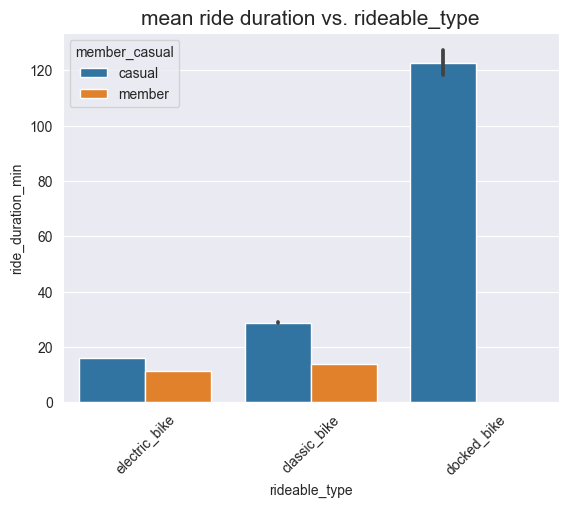

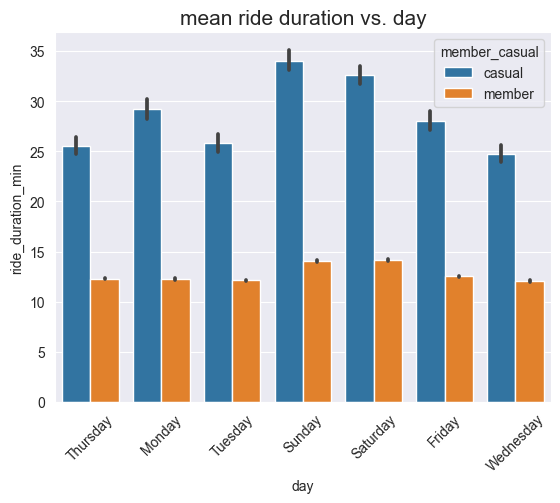

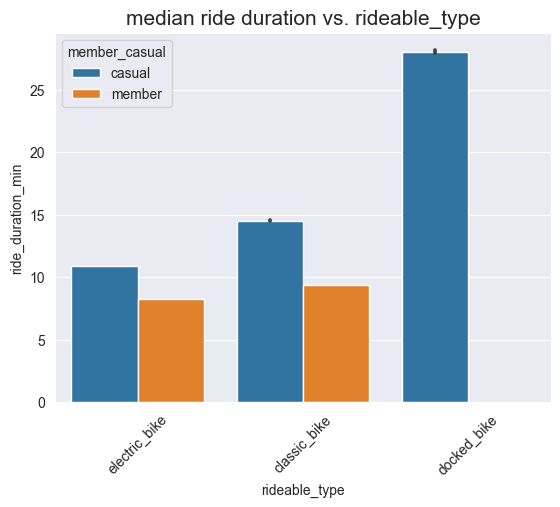

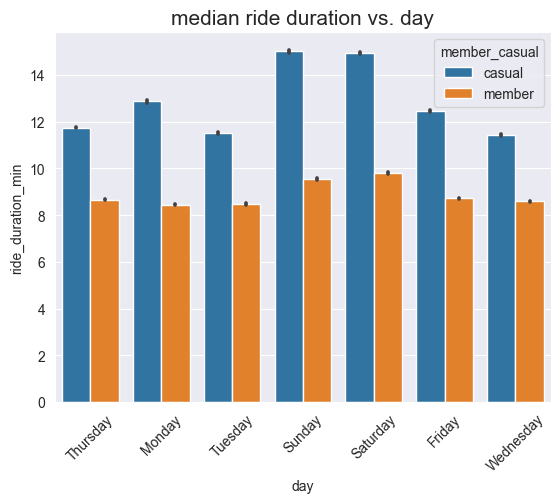

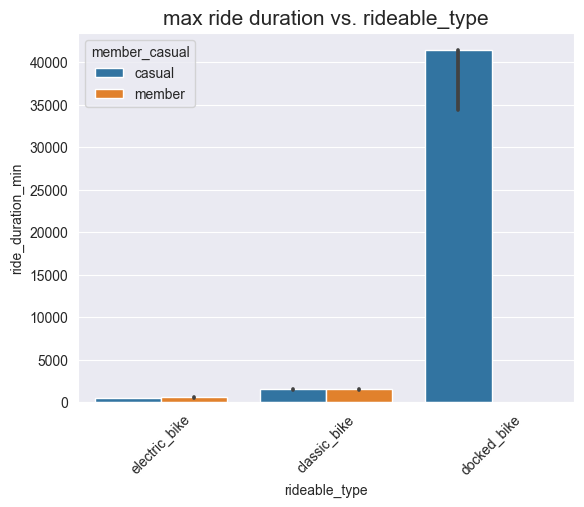

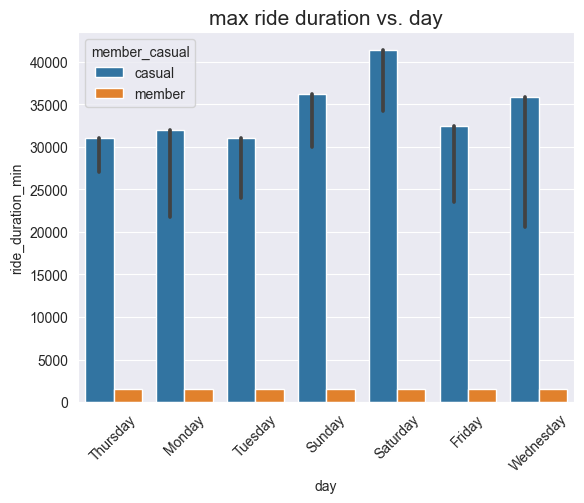

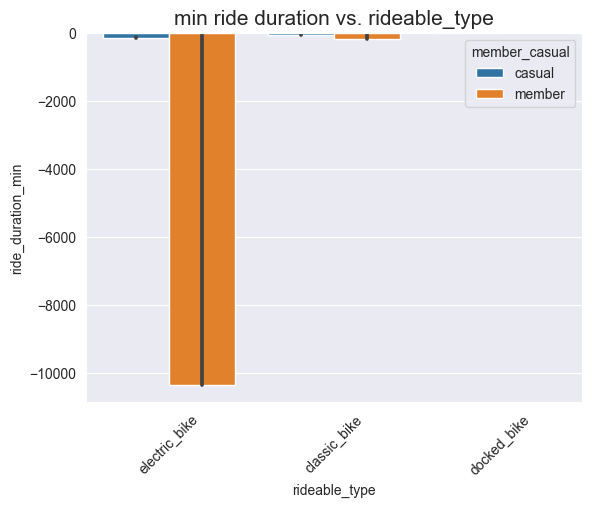

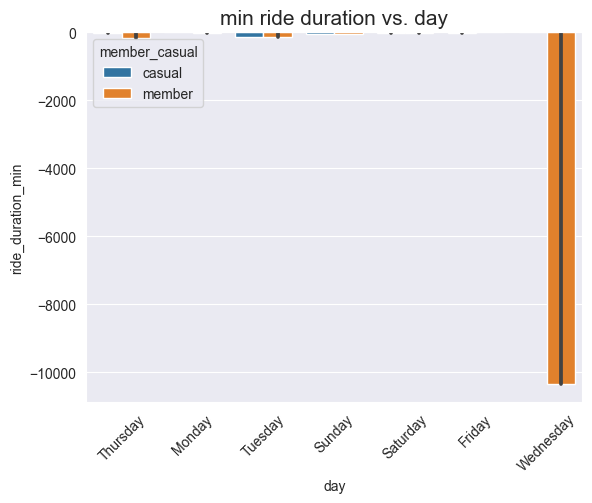

In [11]:
parameter = ['mean','median','max','min']
categories = ['rideable_type','day']
for value in parameter:
    for j in categories:
        def custom_estimator(z):
            return getattr(np, value)(z)
        sns.barplot(x=j,y='ride_duration_min',data=year_22,hue='member_casual',estimator=custom_estimator)
        plt.title(f'{value} ride duration vs. {j}', fontsize = 15)
        plt.xticks(rotation=45)
        plt.show()

In [12]:
year_22.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_min,ride_duration_hr,start_date,day,hour,time_period
0,0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2.950000,0.049167,2022-01-13,Thursday,11,morning
1,1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,4.350000,0.072500,2022-01-10,Monday,8,morning
2,2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,4.350000,0.072500,2022-01-25,Tuesday,4,night
3,3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,14.933333,0.248889,2022-01-04,Tuesday,0,night
4,4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,6.033333,0.100556,2022-01-20,Thursday,1,night


In [13]:
x = year_22[year_22['ride_duration_min'] < 0 ]
x.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_min,ride_duration_hr,start_date,day,hour,time_period
403591,403591,2D97E3C98E165D80,classic_bike,2022-03-05 11:00:57,2022-03-05 10:55:01,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.936688,-87.636829,41.936688,-87.636829,casual,-5.933333,-0.098889,2022-03-05,Saturday,11,morning
406768,406768,7407049C5D89A13D,electric_bike,2022-03-05 11:38:04,2022-03-05 11:37:57,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.936313,-87.652522,41.936253,-87.652662,casual,-0.116667,-0.001944,2022-03-05,Saturday,11,morning
1467055,1467055,0793C9208A64302A,electric_bike,2022-05-30 11:06:29,2022-05-30 11:06:17,Broadway & Waveland Ave,13325,NaN,NaN,41.949069,-87.648499,41.950000,-87.650000,casual,-0.200000,-0.003333,2022-05-30,Monday,11,morning
1635637,1635637,B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,NaN,NaN,Kostner Ave & North Ave,519,41.900000,-87.740000,41.910000,-87.740000,casual,-130.033333,-2.167222,2022-06-07,Tuesday,19,evening
1636060,1636060,072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,W Armitage Ave & N Sheffield Ave,20254.0,W Armitage Ave & N Sheffield Ave,20254.0,41.920000,-87.650000,41.920000,-87.650000,casual,-127.016667,-2.116944,2022-06-07,Tuesday,19,evening


***Since ride duration can never be negative, therefore dropping the outliers***

In [14]:
year_22.drop(x.index,axis=0,inplace=True)

In [15]:
%matplotlib inline

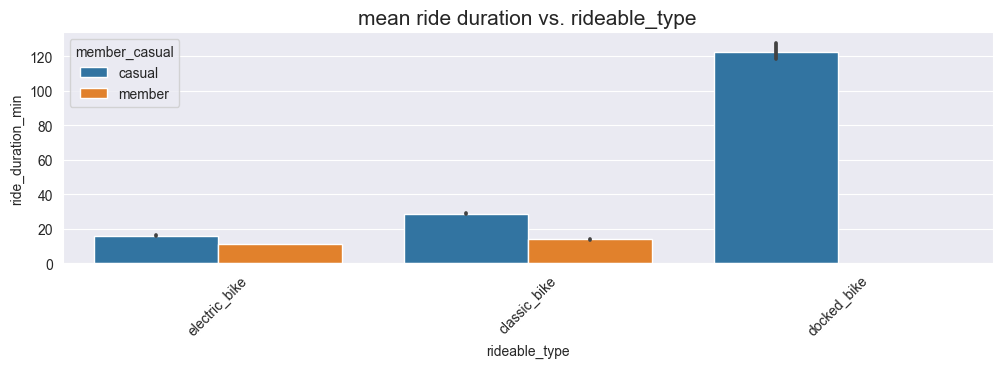

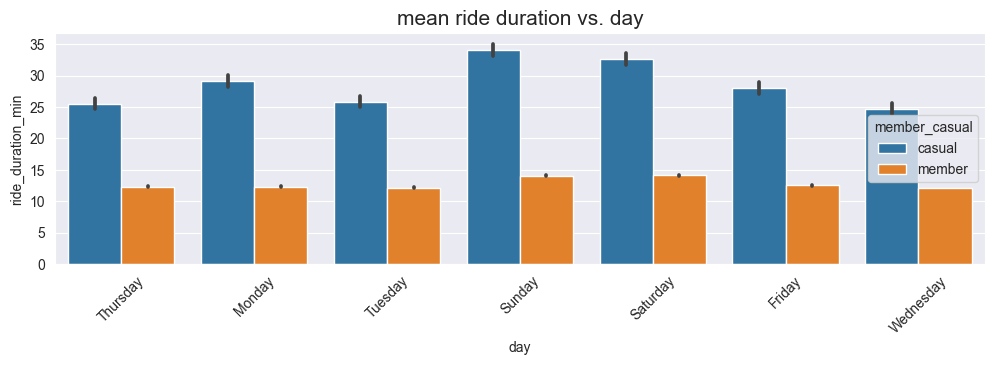

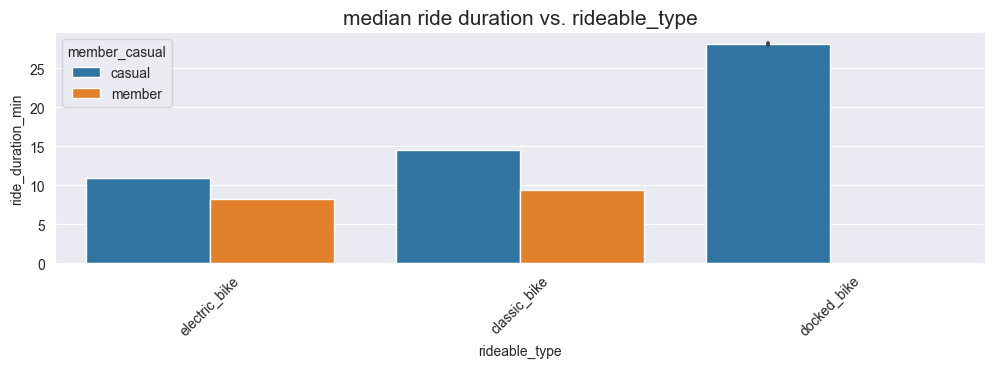

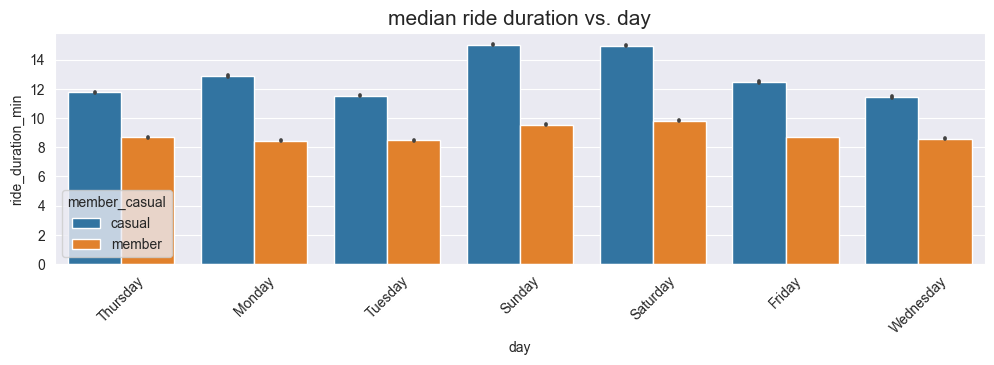

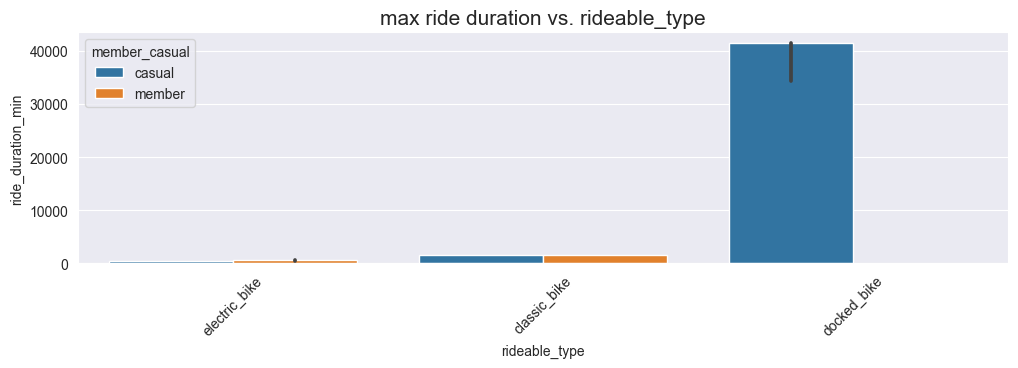

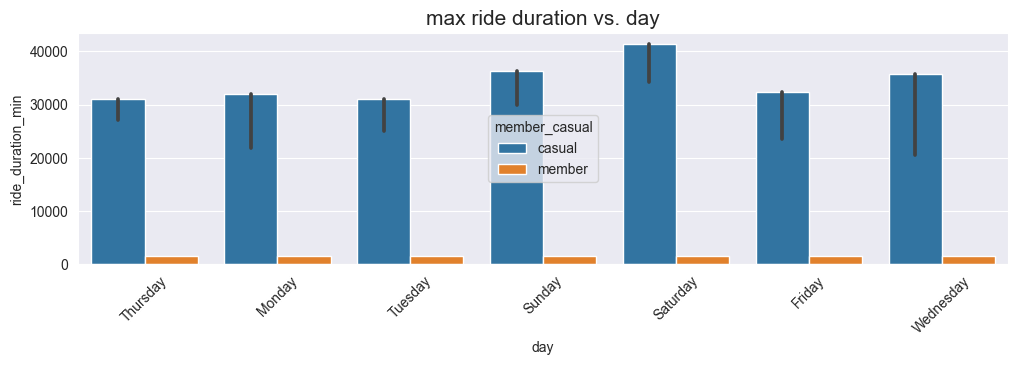

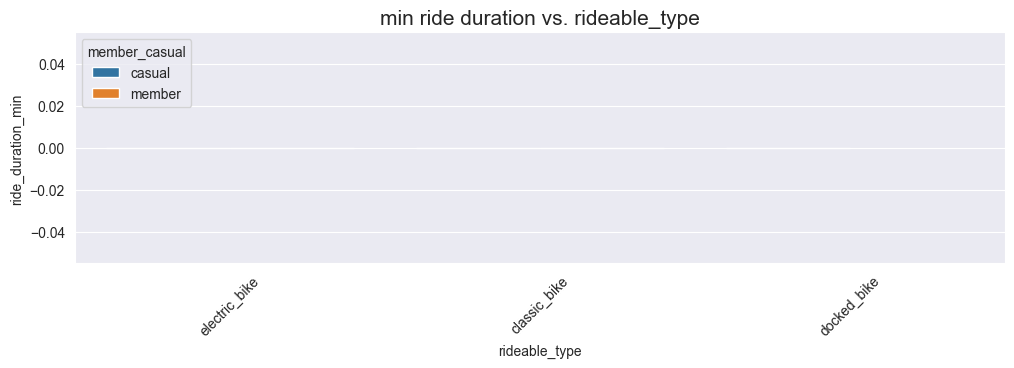

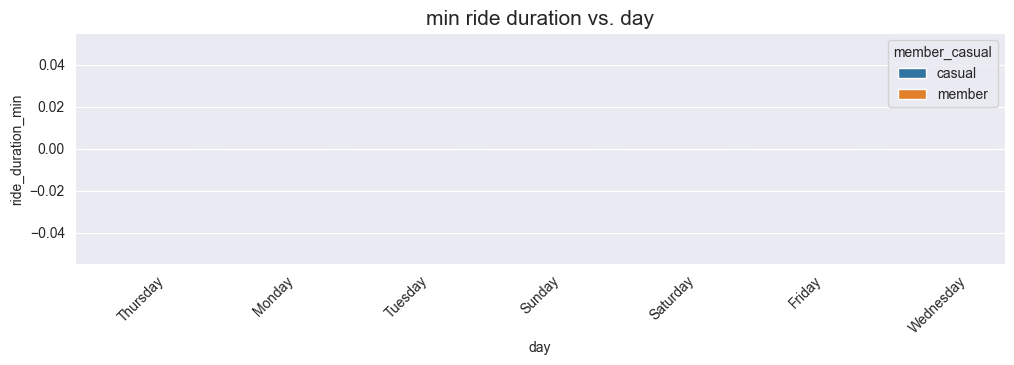

In [16]:
parameter = ['mean','median','max','min']
categories = ['rideable_type','day']
for value in parameter:
    for j in categories:
        def custom_estimator(z):
            return getattr(np, value)(z)
        plt.figure(figsize=(12,3))
        sns.barplot(x=j,y='ride_duration_min',data=year_22,hue='member_casual',estimator=custom_estimator)
        plt.title(f'{value} ride duration vs. {j}', fontsize = 15)
        plt.xticks(rotation=45)
        plt.show()

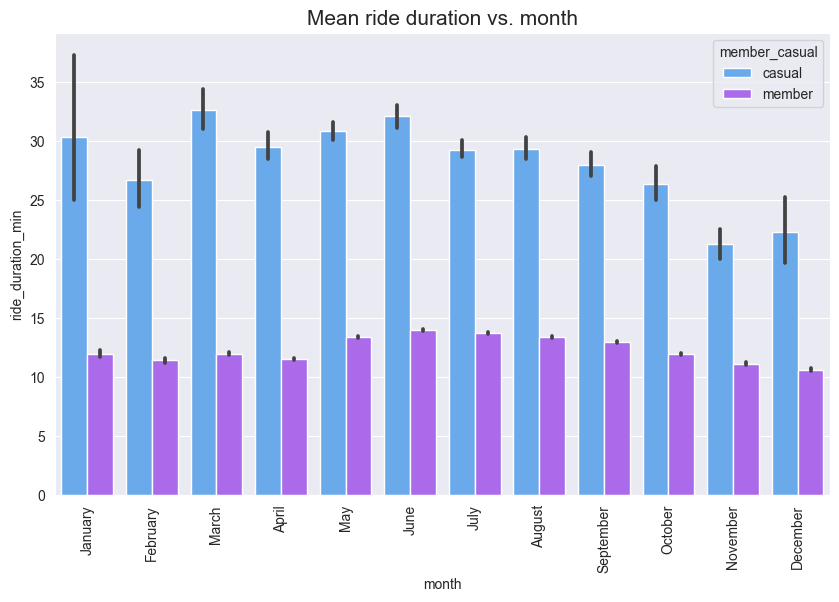

In [19]:
year_22['month'] = year_22.started_at.dt.month_name()

def custom_estimator(z):
    return np.mean(z)
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.barplot(x='month',y= 'ride_duration_min',data = year_22,hue='member_casual',palette='cool',estimator=custom_estimator)

plt.title('Mean ride duration vs. month',fontsize=15)
plt.xticks(rotation=90)
plt.show()

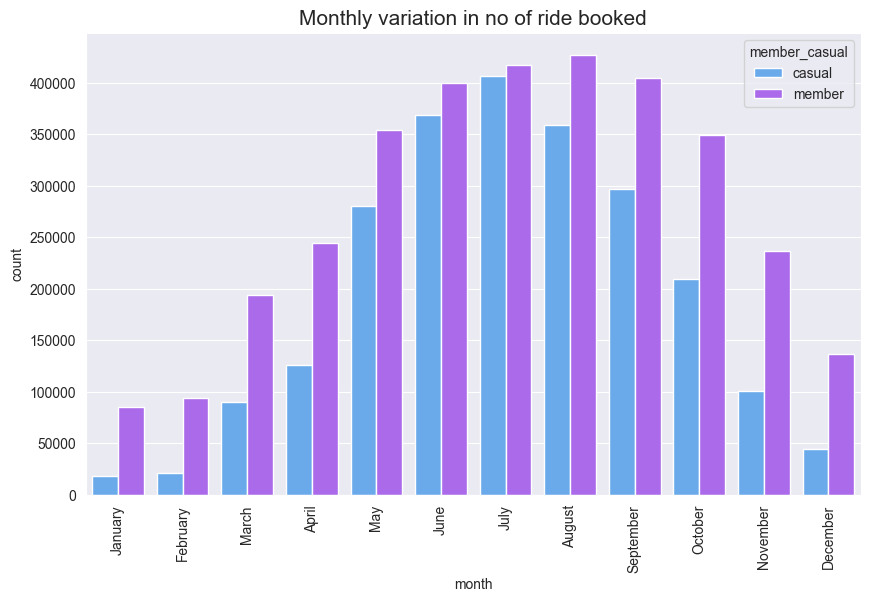

In [18]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.countplot(x='month',data = year_22,hue='member_casual',palette='cool')

plt.title('Monthly variation in no of ride booked',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## 2. Analysing distance covered 

In [21]:
# Haversine is used to calculate the distances on the earth surface 
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) * np.sin(dlat / 2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) * np.sin(dlon / 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Calculate distance for each ride
year_22['distance_km'] = haversine(year_22['start_lat'], year_22['start_lng'], year_22['end_lat'], year_22['end_lng'])

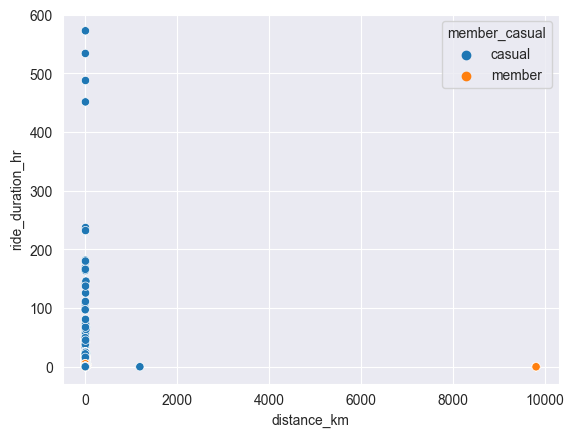

In [22]:
sns.set_style('darkgrid')
sns.scatterplot(x='distance_km',y='ride_duration_hr',data=year_22,hue='member_casual')

plt.show()

In [23]:
year_dis = year_22.copy()
year_dis.drop((year_dis[year_dis['distance_km'] > 100 ]).index,axis=0,inplace=True)
year_dis.drop((year_dis[year_dis['ride_duration_hr'] > 24 ]).index,axis=0,inplace=True)

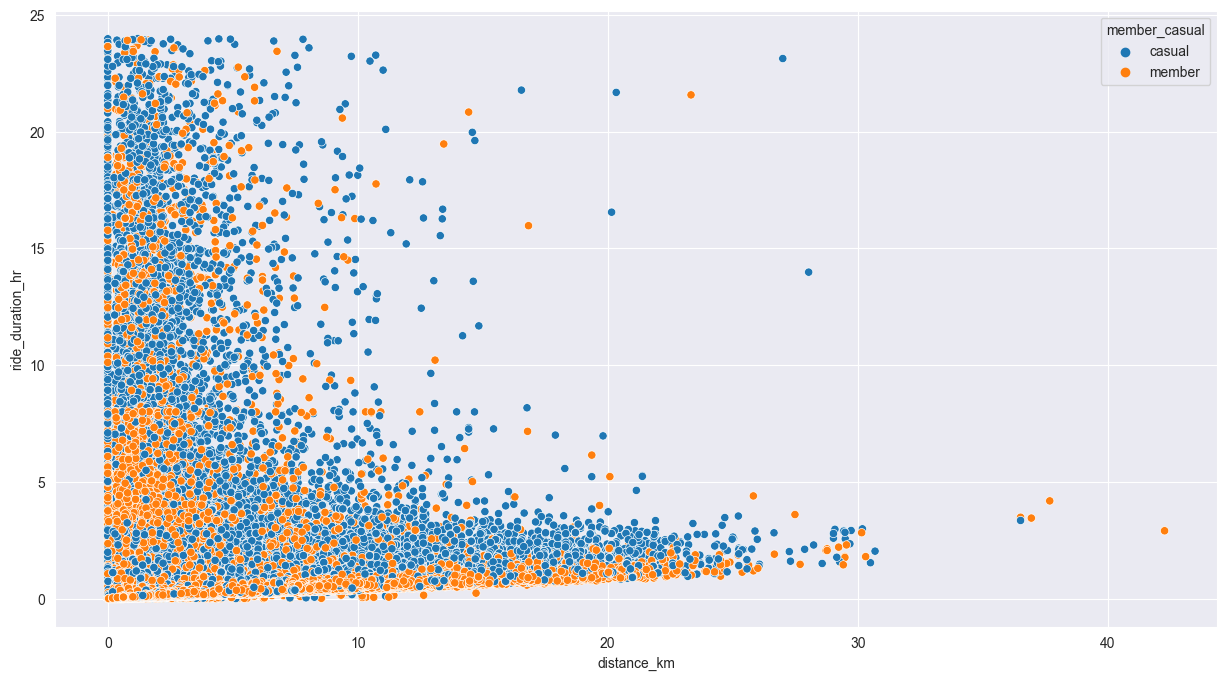

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.scatterplot(x='distance_km',y='ride_duration_hr',data=year_dis,hue='member_casual')

plt.show()

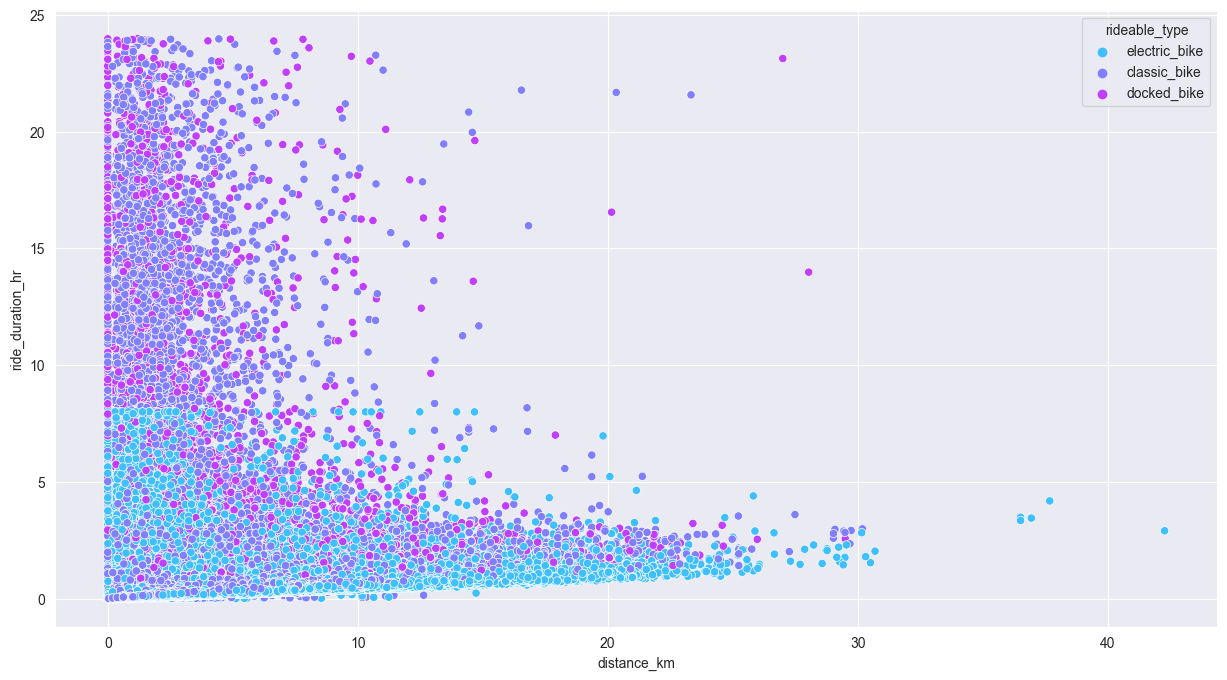

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.scatterplot(x='distance_km',y='ride_duration_hr',data=year_dis,hue='rideable_type',palette='cool')

plt.show()

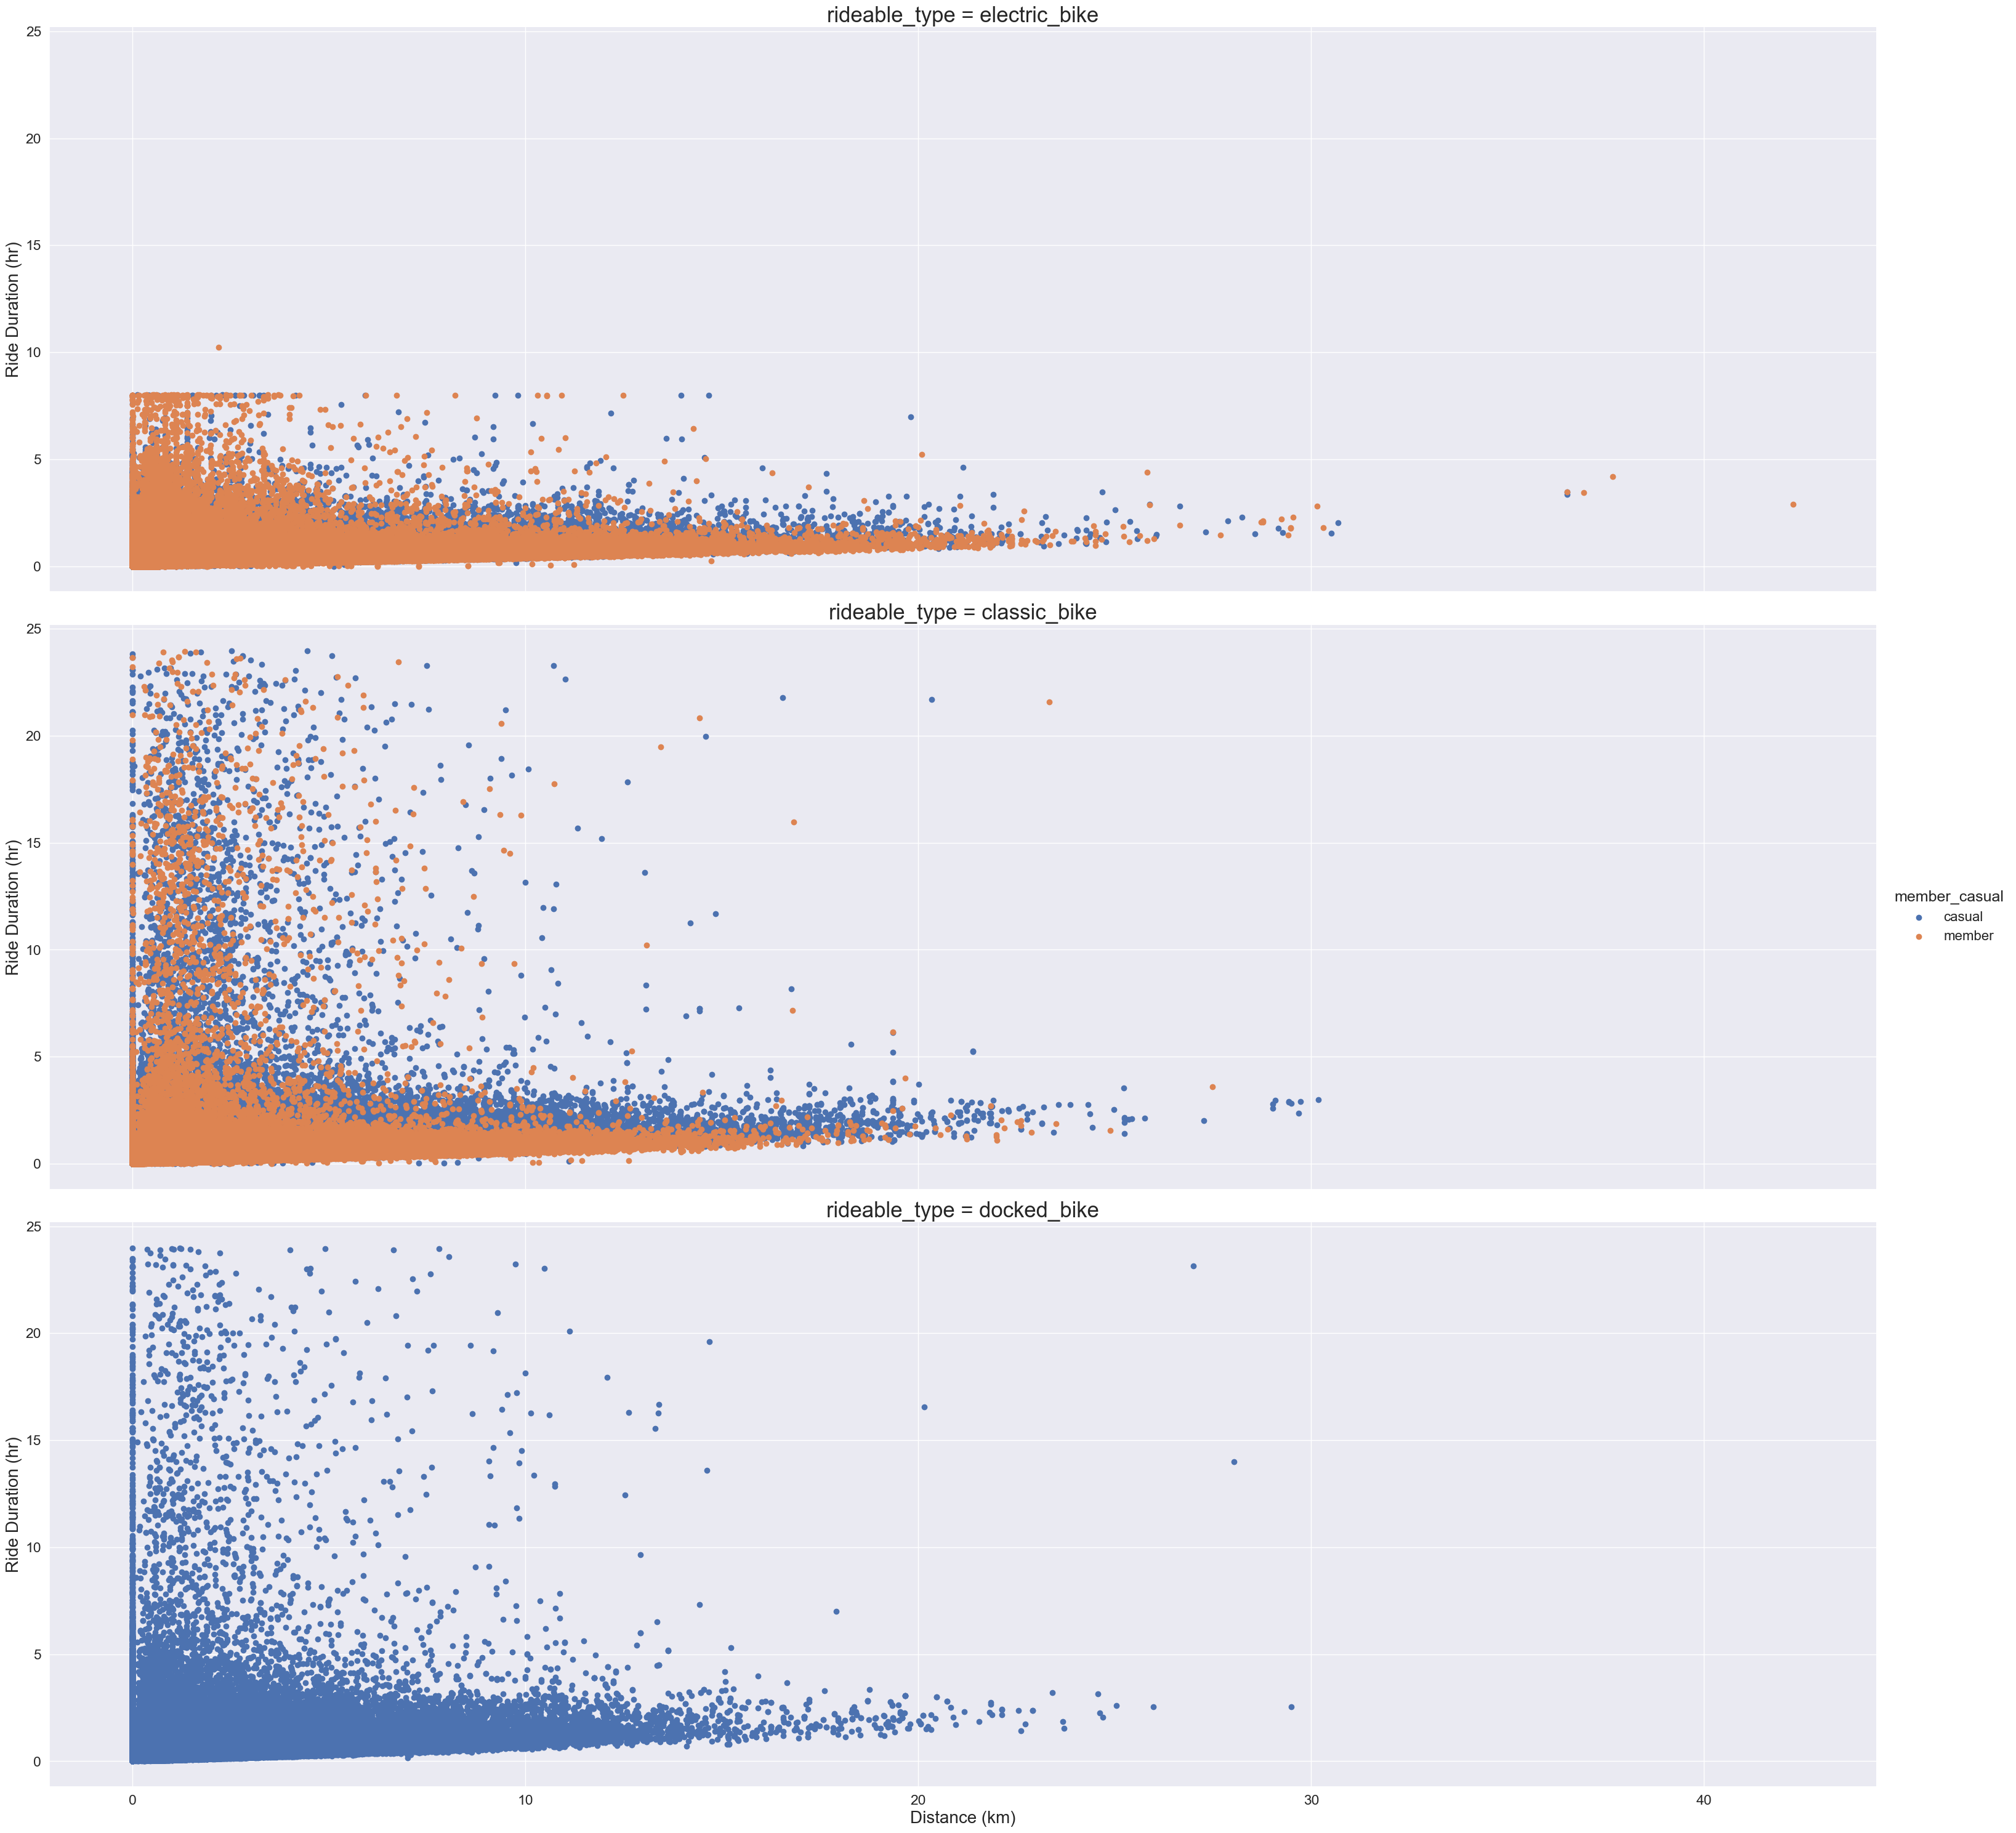

In [26]:
sns.set(font_scale=1.5)
fg = sns.FacetGrid(year_dis,col='rideable_type',hue='member_casual',height=10,aspect=3.1,col_wrap=1)
fg.map(plt.scatter,'distance_km','ride_duration_hr').add_legend(fontsize = 16)

for ax in fg.axes.flat:
    ax.set_title(ax.get_title(), fontsize=25)
fg.set_axis_labels(x_var="Distance (km)", y_var="Ride Duration (hr)", fontsize=20)

plt.show()

In [27]:
year_dis['rideable_type'].value_counts()

electric_bike    2888955
classic_bike     2597856
docked_bike       175437
Name: rideable_type, dtype: int64

## 3. Route analysis

In [39]:
year_22.distance_km.sort_values(ascending=False)

5168833    9814.069405
5392053    9813.377581
5390978    9813.072285
5392312    9812.917737
5392565    9812.916337
              ...     
5661040            NaN
5661168            NaN
5661311            NaN
5661529            NaN
5661604            NaN
Name: distance_km, Length: 5667617, dtype: float64

In [40]:
col = ['start_station_name','end_station_name','distance_km','ride_duration_hr','rideable_type','member_casual']
distance = year_22[col].sort_values(by='distance_km',ascending=False)
distance.head(10)

,start_station_name,end_station_name,distance_km,ride_duration_hr,rideable_type,member_casual
5168833,Laflin St & Cullerton St,Green St & Madison Ave*,9814.069405,0.340556,electric_bike,casual
5392053,Aberdeen St & Randolph St,Green St & Madison Ave*,9813.377581,0.073056,classic_bike,member
5390978,Morgan St & Polk St,Green St & Madison Ave*,9813.072285,0.150278,classic_bike,casual
5392312,Green St & Madison St,Green St & Madison Ave*,9812.917737,0.004167,classic_bike,member
5392565,Green St & Washington Blvd,Green St & Madison Ave*,9812.916337,0.023333,classic_bike,member
5173666,Canal St & Adams St,Green St & Madison Ave*,9812.174386,0.076944,classic_bike,member
5149213,Franklin St & Adams St (Temp),Green St & Madison Ave*,9811.810795,0.093056,classic_bike,member
5392494,LaSalle St & Jackson Blvd,Green St & Madison Ave*,9811.511040,0.128889,classic_bike,member
11761,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,1189.522003,0.043056,electric_bike,casual
1462651,Dearborn St & Adams St,NaN,42.272106,2.904444,electric_bike,member


In [42]:
# Green St & Madison Ave* coordinates are seems to be wrong becasue it is not possible to cover this large disctance in less than one hour 
# removing the outliers 
distance.drop((distance[distance['distance_km'] > 100 ]).index,axis=0,inplace=True)

In [44]:
distance.head()

,start_station_name,end_station_name,distance_km,ride_duration_hr,rideable_type,member_casual
1462651,Dearborn St & Adams St,NaN,42.272106,2.904444,electric_bike,member
2938254,Chicago Ave & Sheridan Rd,NaN,37.678696,4.185000,electric_bike,member
4296455,Ellis Ave & 55th St,NaN,36.942712,3.448333,electric_bike,member
3921517,NaN,NaN,36.511694,3.483889,electric_bike,member
3895311,NaN,NaN,36.511694,3.473056,electric_bike,casual


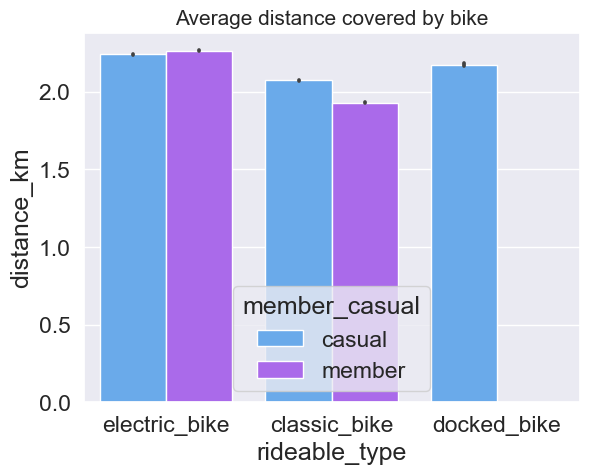

In [45]:
sns.set_style('darkgrid')
sns.barplot(x='rideable_type',y='distance_km',data=distance,hue='member_casual',palette='cool',hue_order=['casual','member'])

plt.title('Average distance covered by bike',fontsize=15)

plt.show()

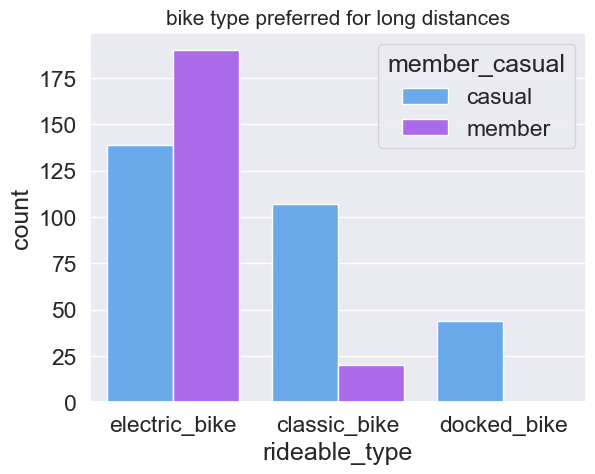

In [46]:
distance_viz = distance.head(500)
sns.set_style('darkgrid')
sns.countplot(x='rideable_type',data=distance_viz,hue='member_casual',palette='cool',hue_order=['casual','member'])

plt.title('bike type preferred for long distances',fontsize=15)

plt.show()

***Generally classic bike is preferred by the members, but when it comes to the long distances member prefer to use the electric bike by a huge margin. whereas for the causual riders proportions are same which means there seems to be no preference order.*** 

In [47]:
#  filling the missing station names
#  can be done by making a dictionary of all the station_id and corresponding station_names and then mapping it to the original data. 
#  will only be able to fill the names if it exist in the data along with its corresponding station_id at least once. 
year = year_22.copy()
station_mapping = year.dropna(subset=['end_station_name']).set_index('end_station_id')['end_station_name'].to_dict()
year['end_station_name'] = year['end_station_name'].fillna(year['end_station_id'].map(station_mapping))
year.isna().sum()

Unnamed: 0                 0
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833041
start_station_id      833041
end_station_name      892726
end_station_id        892726
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
ride_duration_min          0
ride_duration_hr           0
start_date                 0
day                        0
hour                       0
time_period                0
month                      0
distance_km             5858
dtype: int64

In [48]:
year_22.isna().sum()
## it is not able to fill any station name which means the name of the station is not there in the data along with its station_id 

Unnamed: 0                 0
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833041
start_station_id      833041
end_station_name      892726
end_station_id        892726
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
ride_duration_min          0
ride_duration_hr           0
start_date                 0
day                        0
hour                       0
time_period                0
month                      0
distance_km             5858
dtype: int64

In [49]:
# longest distances covered by bike 
# Dropping NaN values
distance = distance.dropna()
distance.head(10)

,start_station_name,end_station_name,distance_km,ride_duration_hr,rideable_type,member_casual
5356064,Shore Dr & 55th St,Sheridan Rd & Noyes St (NU),30.315461,1.797778,electric_bike,member
1533205,Ellis Ave & 60th St,Chicago Ave & Sheridan Rd,30.185947,2.988056,classic_bike,casual
297682,Lake Park Ave & 56th St,University Library (NU),29.734008,2.916111,classic_bike,casual
2579490,Museum of Science and Industry,Benson Ave & Church St,29.685222,2.346111,classic_bike,casual
1533235,Shore Dr & 55th St,Chicago Ave & Sheridan Rd,29.500745,2.556944,docked_bike,casual
4485986,Paulina St & Howard St,South Shore Dr & 71st St,29.489075,2.834722,classic_bike,casual
2804131,Benson Ave & Church St,Lake Park Ave & 56th St,29.436537,2.888056,classic_bike,casual
2804112,Benson Ave & Church St,Lake Park Ave & 56th St,29.436537,2.914722,classic_bike,casual
3520609,Lake Park Ave & 53rd St,University Library (NU),29.086284,2.967500,classic_bike,casual
2345535,Greenview Ave & Jarvis Ave,South Shore Dr & 71st St,29.026355,2.587500,classic_bike,casual


In [50]:
# Most frequently used route
station_pairs_count = distance.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')
station_pairs_count.sort_values(by='count',ascending=False).head(10)

,start_station_name,end_station_name,count
152957,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,12201
55678,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,7375
59214,Ellis Ave & 60th St,University Ave & 57th St,6797
155033,University Ave & 57th St,Ellis Ave & 60th St,6362
59132,Ellis Ave & 60th St,Ellis Ave & 55th St,6359
58820,Ellis Ave & 55th St,Ellis Ave & 60th St,5716
55928,DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,5612
105825,Michigan Ave & Oak St,Michigan Ave & Oak St,5555
108044,Millennium Park,Millennium Park,4456
110478,Montrose Harbor,Montrose Harbor,3617


In [51]:
# Most frequently used routes for the casual riders
dist_cas = distance[distance['member_casual']=='casual']
station_pairs_count = dist_cas.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')
station_pairs_count.sort_values(by='count',ascending=False).head(10)

,start_station_name,end_station_name,count
116365,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,10631
42714,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,6615
42939,DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,5100
80748,Michigan Ave & Oak St,Michigan Ave & Oak St,4612
82603,Millennium Park,Millennium Park,4060
84538,Montrose Harbor,Montrose Harbor,2939
116104,Streeter Dr & Grand Ave,DuSable Lake Shore Dr & Monroe St,2854
116250,Streeter Dr & Grand Ave,Millennium Park,2735
103720,Shedd Aquarium,Shedd Aquarium,2479
43124,DuSable Lake Shore Dr & North Blvd,DuSable Lake Shore Dr & North Blvd,2439


In [52]:
# Most frequently used routes for the member riders
dist_mem = distance[distance['member_casual']=='member']
station_pairs_count = dist_mem.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')
station_pairs_count.sort_values(by='count',ascending=False).head(10)

,start_station_name,end_station_name,count
48480,Ellis Ave & 60th St,University Ave & 57th St,5848
125145,University Ave & 57th St,Ellis Ave & 60th St,5544
48408,Ellis Ave & 60th St,Ellis Ave & 55th St,5278
48179,Ellis Ave & 55th St,Ellis Ave & 60th St,4745
119398,State St & 33rd St,Calumet Ave & 33rd St,3268
16710,Calumet Ave & 33rd St,State St & 33rd St,3215
80357,Loomis St & Lexington St,Morgan St & Polk St,2891
91350,Morgan St & Polk St,Loomis St & Lexington St,2876
125166,University Ave & 57th St,Kimbark Ave & 53rd St,2267
80289,Loomis St & Lexington St,Halsted St & Polk St,2091


In [54]:
## Distance covered by casual and memeber riders 
dit = {
    'Average distance (km)': distance.groupby(by='member_casual')['distance_km'].mean(),
    'Median distance (km)': distance.groupby(by='member_casual')['distance_km'].median(),
    'Total distance (km)': distance.groupby(by='member_casual')['distance_km'].sum(),
    'Maximum distance (km)': distance.groupby(by='member_casual')['distance_km'].max()
}
dis_dit = pd.DataFrame(dit)
dis_dit

,Average distance (km),Median distance (km),Total distance (km),Maximum distance (km)
member_casual,,,,
casual,2.149004,1.649512,3.778264e+06,30.185947
member,2.046127,1.497463,5.342714e+06,30.315461


## 4. Station analysis

In [55]:
year_22.start_station_name.value_counts().head(10)

Streeter Dr & Grand Ave               75236
DuSable Lake Shore Dr & Monroe St     41278
DuSable Lake Shore Dr & North Blvd    40090
Michigan Ave & Oak St                 39661
Wells St & Concord Ln                 37515
Clark St & Elm St                     35037
Millennium Park                       35004
Kingsbury St & Kinzie St              33725
Theater on the Lake                   32976
Wells St & Elm St                     31476
Name: start_station_name, dtype: int64

In [56]:
year_22.end_station_name.value_counts().head(10)

Streeter Dr & Grand Ave               75380
DuSable Lake Shore Dr & North Blvd    42140
Michigan Ave & Oak St                 40127
DuSable Lake Shore Dr & Monroe St     40125
Wells St & Concord Ln                 37421
Millennium Park                       35233
Clark St & Elm St                     34488
Theater on the Lake                   32988
Kingsbury St & Kinzie St              32379
Wells St & Elm St                     30336
Name: end_station_name, dtype: int64

#### 'Streeter Dr & Grand Ave' is the most frequently used station. 87% of the rides which starts and end their  are casual. And 'DuSable Lake Shore Dr & North Blvd' is the second frequently used station, 90% of the rides which start and end at this starion are casual. therefore a good places to advertise for the benefits of becoming a member.

In [58]:
# Busiest stations
year_cas = year_22[year_22['member_casual']=='casual']
year_mem = year_22[year_22['member_casual']=='member']
casual_start = year_cas.start_station_name.value_counts()
casual_end   = year_cas.end_station_name.value_counts()
member_start = year_mem.start_station_name.value_counts()
member_end   = year_mem.end_station_name.value_counts()
station_dict = {
    'Number of casual ride started':casual_start,
    'Number of casual ride ended':casual_end,
    'Number of member ride started':member_start,
    'Number of member ride ended':member_end,
    'Average traffic':(casual_start+casual_end+member_start+member_end)/2
}
station = pd.DataFrame(station_dict)
station.sort_values(by='Average traffic',ascending=False).head(10)

,Number of casual ride started,Number of casual ride ended,Number of member ride started,Number of member ride ended,Average traffic
Streeter Dr & Grand Ave,58094.0,59876.0,17142.0,15504.0,75308.0
DuSable Lake Shore Dr & North Blvd,23657.0,26144.0,16433.0,15996.0,41115.0
DuSable Lake Shore Dr & Monroe St,31862.0,29603.0,9416.0,10522.0,40701.5
Michigan Ave & Oak St,25265.0,26450.0,14396.0,13677.0,39894.0
Wells St & Concord Ln,16217.0,15507.0,21298.0,21914.0,37468.0
Millennium Park,25529.0,26677.0,9475.0,8556.0,35118.5
Clark St & Elm St,12997.0,12121.0,22040.0,22367.0,34762.5
Kingsbury St & Kinzie St,8788.0,7743.0,24937.0,24636.0,33052.0
Theater on the Lake,18452.0,19418.0,14524.0,13570.0,32982.0
Wells St & Elm St,12489.0,11614.0,18987.0,18722.0,30906.0


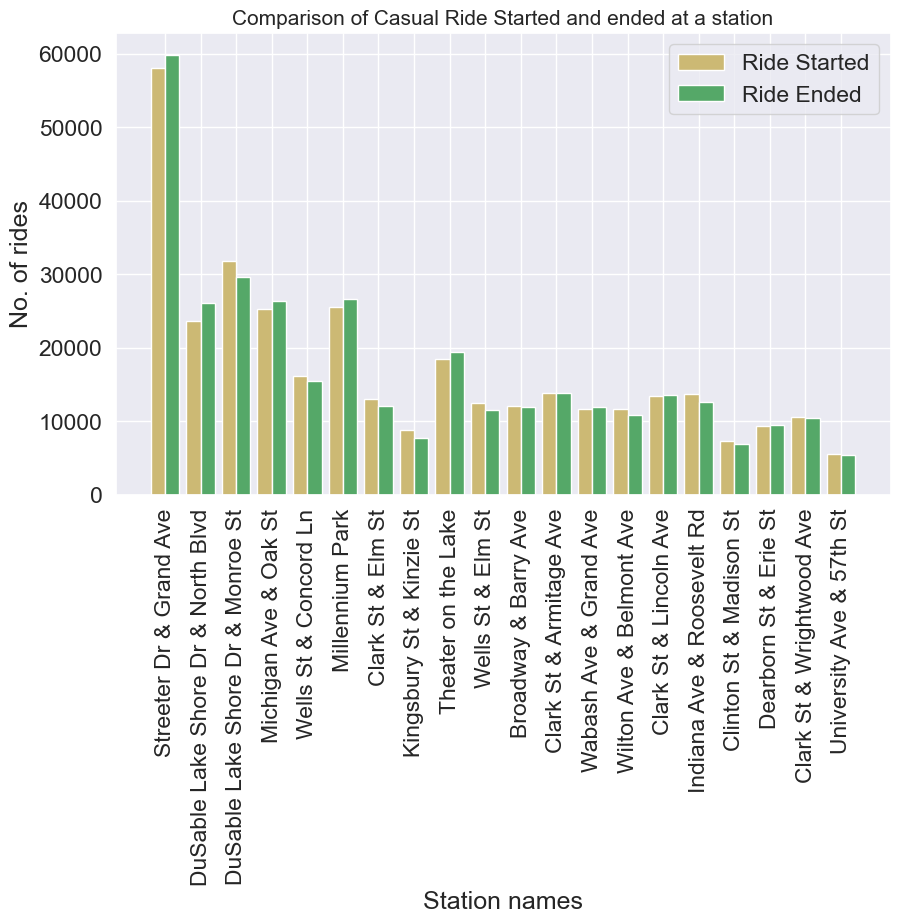

In [61]:
station_viz = station.sort_values(by='Average traffic',ascending=False).head(20)
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

x = np.arange(len(station_viz))
width = 0.4  

plt.bar(x - width/2, station_viz['Number of casual ride started'], width, color='y', label='Ride Started')
plt.bar(x + width/2, station_viz['Number of casual ride ended'], width, color='g', label='Ride Ended')

plt.title('Comparison of Casual Ride Started and ended at a station', fontsize=15)
plt.xlabel('Station names')
plt.ylabel('No. of rides')
plt.xticks(x, station_viz.index, rotation=90)

plt.legend() 
plt.show()

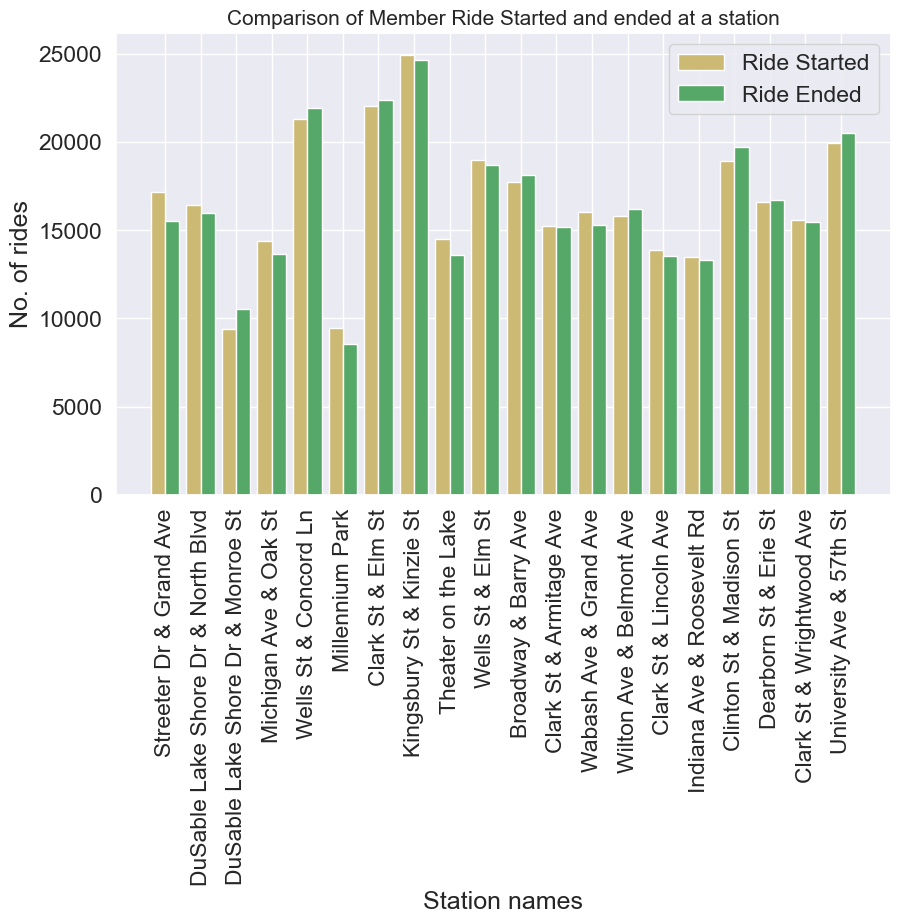

In [62]:
station_viz = station.sort_values(by='Average traffic',ascending=False).head(20)
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

x = np.arange(len(station_viz))
width = 0.4  

plt.bar(x - width/2, station_viz['Number of member ride started'], width, color='y', label='Ride Started')
plt.bar(x + width/2, station_viz['Number of member ride ended'], width, color='g', label='Ride Ended')

plt.title('Comparison of Member Ride Started and ended at a station', fontsize=15)
plt.xlabel('Station names')
plt.ylabel('No. of rides')
plt.xticks(x, station_viz.index, rotation=90)

plt.legend() 
plt.show()

***To check the station ride availablity vizz on Tableau*** [click here](https://public.tableau.com/app/profile/arvind.kumar8011/viz/station_analysis/Dashboard1)